#Лаб 3: Графын үндсэн ойлголт, хэмжүүр, алгоритмууд

In [ ]:
pip install networkx


In [ ]:
pip install powerlaw


In [ ]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

#Граф бүтэц, түүний дүрслэл


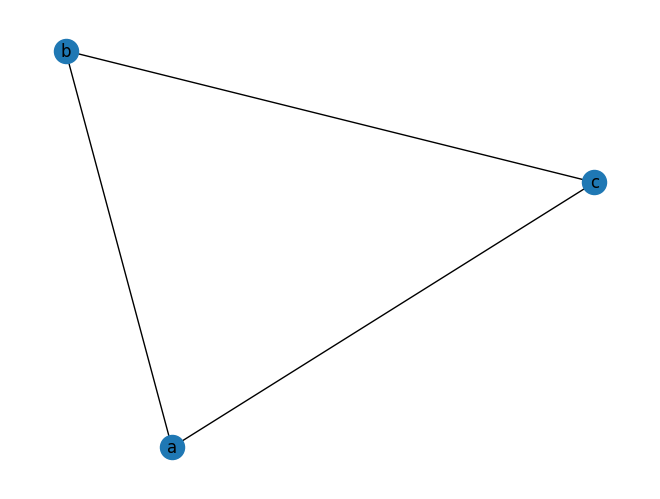

In [ ]:
g = nx.Graph()
g.add_node("a")
g.add_edge("a", "b")
g.add_edge("a", "c")
g.add_edge("b", "c")
nx.draw(g ,with_labels=True)

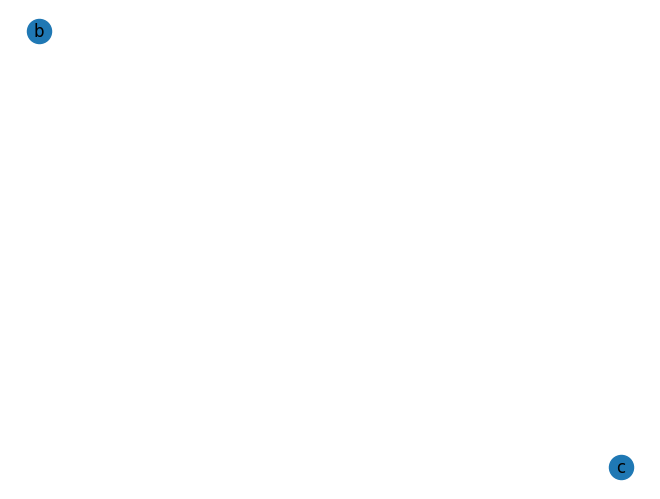

In [ ]:
g.remove_node("a")
g.remove_edge("b", "c")
#re-draw the graph
nx.draw(g, with_labels=True)


#Файлаас өгөгдлөө уншиж графаа байгуулах

In [ ]:
g = nx.read_edgelist("/content/network.csv", delimiter=",", nodetype=int)

#Графын орой болон ирмэгүүд рүү хандах


In [ ]:
for n in g.nodes():
    # do something
    pass

In [ ]:
for e in g.edges():
    # do something
    pass

#Сүлжээний үндсэн статистикууд


In [ ]:
g.number_of_nodes()


333

In [ ]:
g.number_of_edges()

2519

In [ ]:
g.is_directed()

False

#Оройн зэрэг ба зэргийн тархалт

In [ ]:
g.degree(1) # degree for node 1


16

In [ ]:
sum(dict(g.degree()).values())/float(len(g))

15.12912912912913

[]

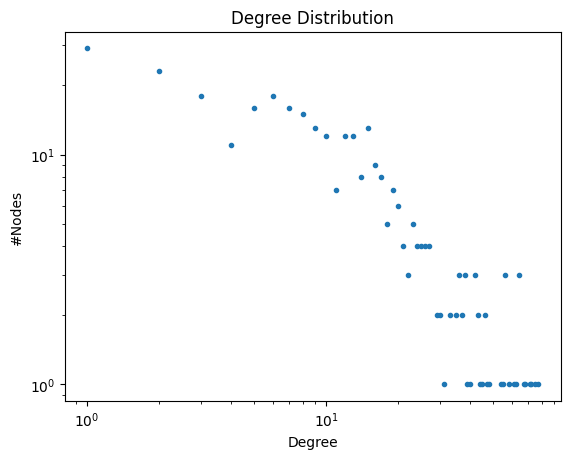

In [ ]:
hist = nx.degree_histogram(g)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

In [ ]:
def plot_dist(G):
    # Convert to sparse matrix
    M = nx.to_scipy_sparse_array(G)

    # Compute degree distribution
    indegrees = np.array(M.sum(axis=0)).flatten()
    degree = np.bincount(indegrees)

    # Fit power-law distribution
    fit = powerlaw.Fit(degree + 1, fit_method='KS')

    # Create figure
    fig = plt.figure(figsize=(16, 6))

    # Plot Distribution
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)), degree, 'b.')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim((max(1, min(degree)), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')
    plt.title('Degree Distribution')

    # Plot CDF
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Function')

    # Plot CCDF
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.xlabel('Degree')
    plt.ylabel('CCDF')
    plt.title('Complementary CDF')

    plt.tight_layout()
    plt.show()

Calculating best minimal value for power law fit


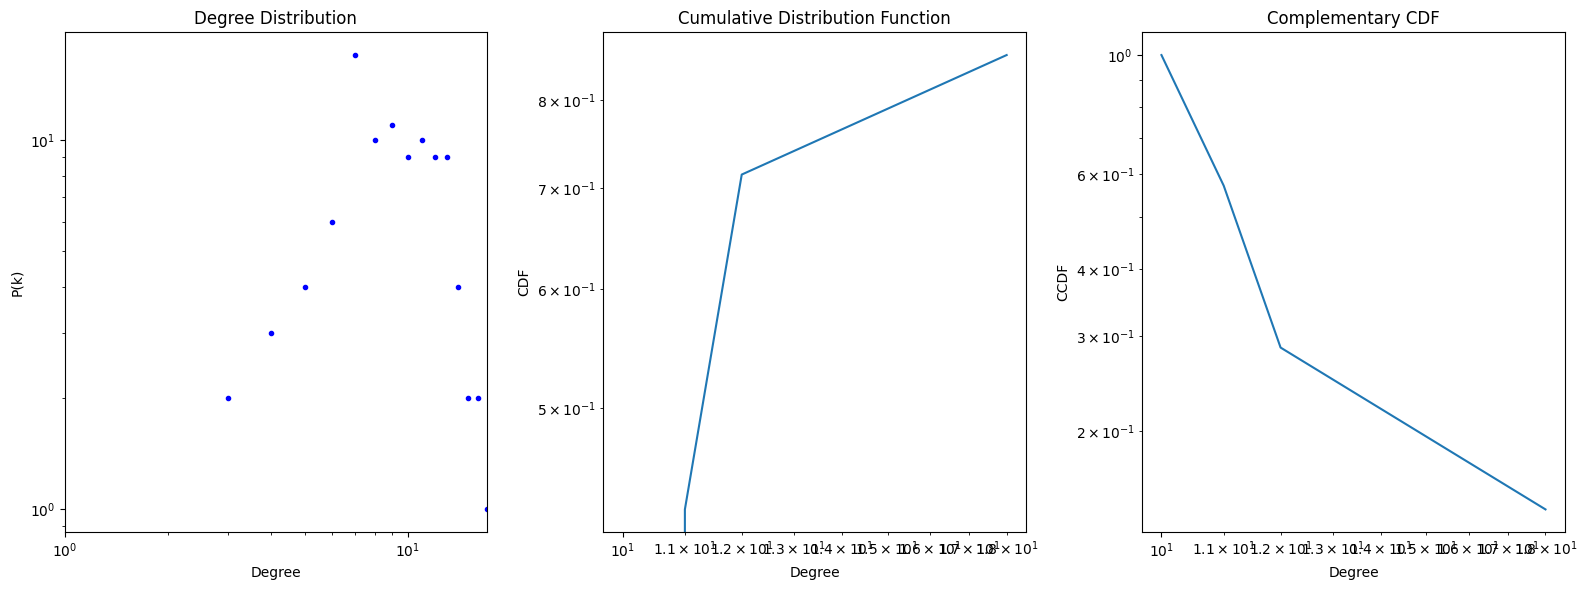

In [ ]:
g = nx.erdos_renyi_graph(100, 0.1)
plot_dist(g)

#Граф компонентууд

In [ ]:
list(g.neighbors(0)) # obtain the list of neighobors for node 0

[27, 36, 37, 38, 44, 47, 50, 54, 55, 85, 93]

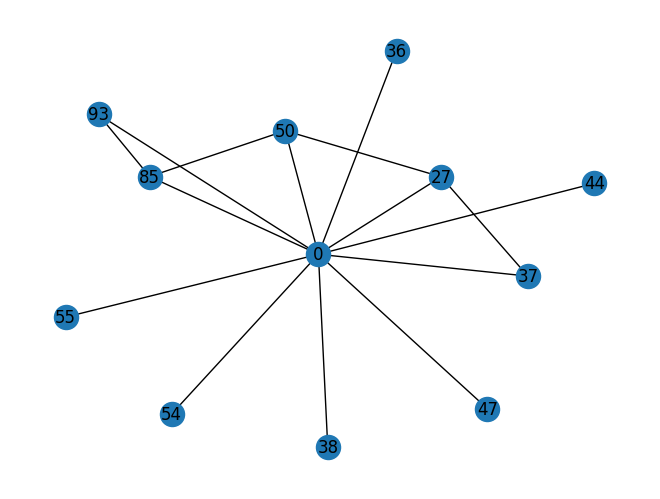

In [ ]:
ego = nx.ego_graph(g, 0) # ego network of the node 0
nx.draw(ego, with_labels=True)

In [ ]:
nx.number_connected_components(g)

1

In [ ]:
comps = list(nx.connected_components(g))

# Check if there's more than one component before trying to access the second one
if len(comps) > 1:
    comp_1 = nx.subgraph(g, comps[1])  # build a subgraph on the second component if it exists
    nx.draw(comp_1)
else:
    print("The graph has only one connected component.")

The graph has only one connected component.


#Граф дахь замууд болон диаметр


In [ ]:
nx.shortest_path(g, source=0, target=30)


[0, 44, 30]

In [ ]:
nx.shortest_path_length(g, source=0, target=30)

2

In [ ]:
nx.diameter(g.subgraph(comps[0]))

4

#Triangles, density and clustering

In [ ]:
nx.density(g)


0.09595959595959595

In [ ]:
nx.triangles(g)[0]

4

In [ ]:
nx.clustering(g)[0]

0.07272727272727272

In [ ]:
nx.average_clustering(g)

0.1043205944382414

# fakefriends.csv файл дээр анализ хийсэн хэсэг

Энэ датасет нь хувь хүмүүсийн нас болон тухайн хүний сошиал сүлжээн дэх найзуудын тоог агуулсан мэдээллийг багтаасан байна. Үүнийг ашиглан нас ба сошиал холболтын хоорондын хамаарлыг шинжлэх, демографик судалгаа хийх, сошиал сүлжээний хэв маягийг олж илрүүлэхэд ашиглаж болно.

In [ ]:
data_path = "/content/fakefriends.csv"
df = pd.read_csv(data_path)

In [ ]:
g = nx.Graph()

In [ ]:
g.add_edges_from(df.iloc[:, [0, 1]].values)

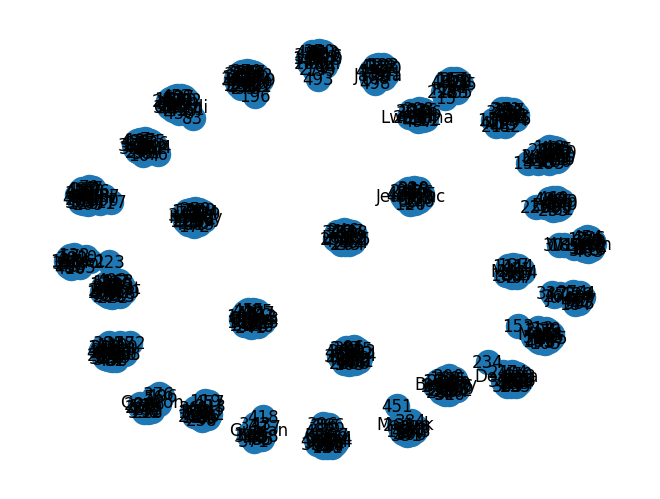

In [ ]:
nx.draw(g, with_labels=True)
plt.show()

In [ ]:
# Graph statistics
print("Number of nodes:", g.number_of_nodes())
print("Number of edges:", g.number_of_edges())
print("Is directed:", g.is_directed())
print("Degree of node 1:", g.degree(1))
print("Average degree:", sum(dict(g.degree()).values()) / float(len(g)))

Number of nodes: 529
Number of edges: 499
Is directed: False
Degree of node 1: 1
Average degree: 1.886578449905482


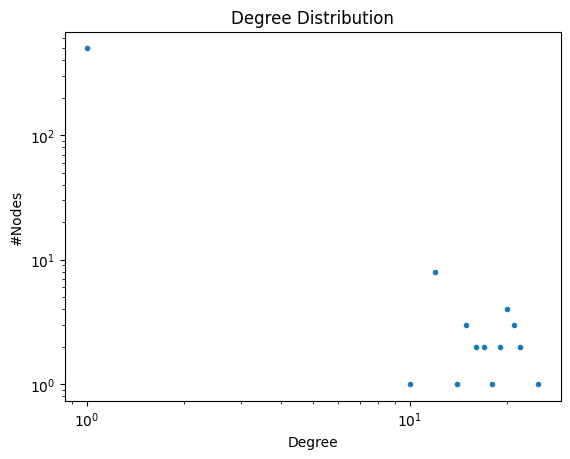

In [ ]:
hist = nx.degree_histogram(g)
plt.plot(range(len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()


Calculating best minimal value for power law fit


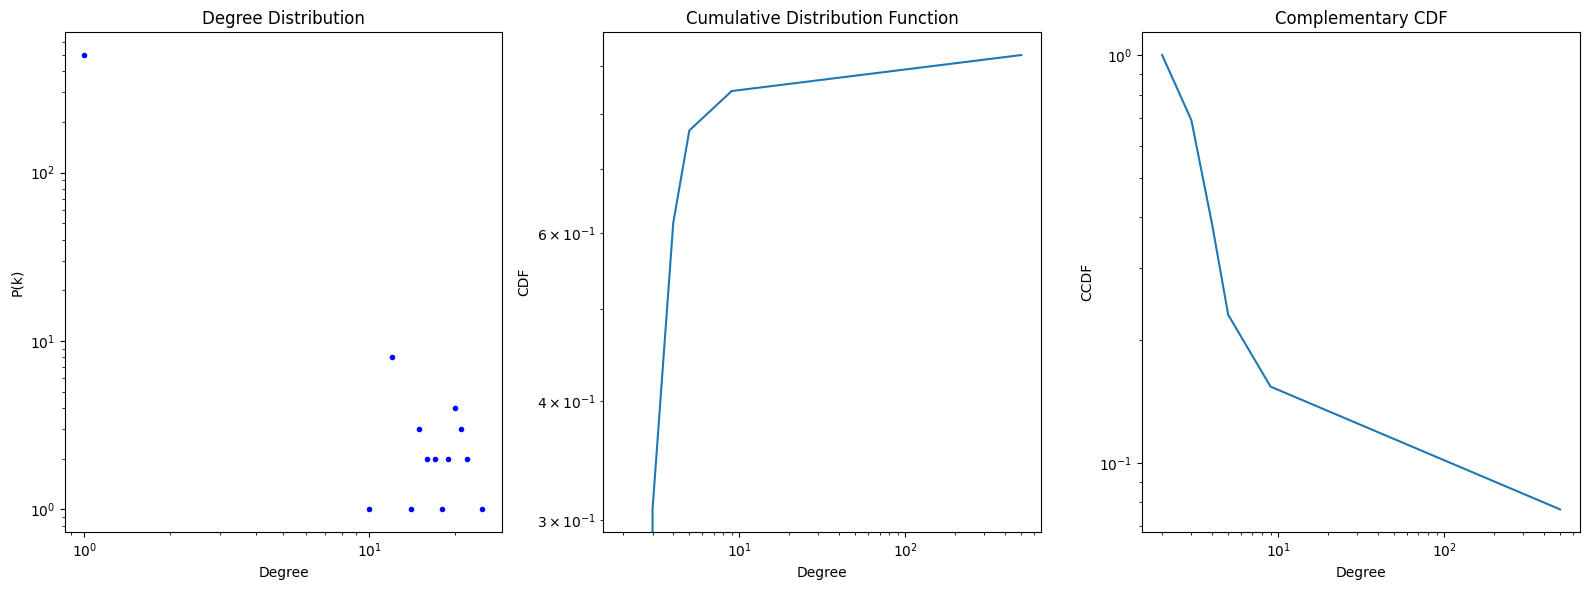

In [ ]:
def plot_dist(G):
    M = nx.to_scipy_sparse_array(G)
    indegrees = np.array(M.sum(axis=0)).flatten()
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(degree + 1, fit_method='KS')

    fig = plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)), degree, 'b.')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('P(k)')
    plt.title('Degree Distribution')

    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')
    plt.title('Cumulative Distribution Function')

    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.xlabel('Degree')
    plt.ylabel('CCDF')
    plt.title('Complementary CDF')

    plt.tight_layout()
    plt.show()

plot_dist(g)


In [ ]:
print("Сүлжээний холбоост компонентууд:", nx.number_connected_components(g))
comps = list(nx.connected_components(g))


Сүлжээний холбоост компонентууд: 30


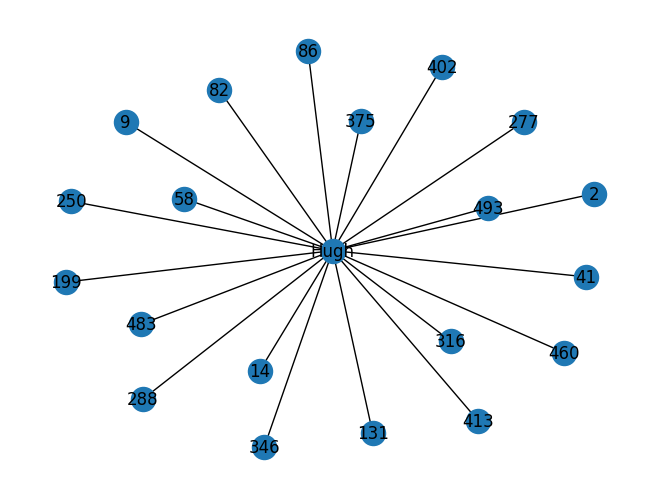

In [ ]:
if len(comps) > 1:
    comp_1 = nx.subgraph(g, comps[1])
    nx.draw(comp_1, with_labels=True)
    plt.show()
else:
    print("График нь зөвхөн нэг холбогдсон бүрэлдэхүүн хэсэгтэй.")


In [ ]:
source, target = 0, 30
if source in g and target in g:
    print("Shortest path:", nx.shortest_path(g, source=source, target=target))
    print("Shortest path length:", nx.shortest_path_length(g, source=source, target=target))
else:
    print(f"Either source node {source} or target node {target} is not in the graph.")

print("Graph density:", nx.density(g))

Either source node 0 or target node 30 is not in the graph.
Graph density: 0.00357306524603311


In [ ]:
print("Triangles at node 0:", nx.triangles(g).get(0, 0))
print("Clustering coefficient at node 0:", nx.clustering(g).get(0, 0))
print("Average clustering coefficient:", nx.average_clustering(g))


Triangles at node 0: 0
Clustering coefficient at node 0: 0
Average clustering coefficient: 0.0
